### Problem Statement
> A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

|Variable|Definition|
|:---- |:----
|User_ID|User ID|
|Product_ID|Product ID|
|Gender|Sex of User|
|Age|Age in bins|
|Occupation|Occupation (Masked)|
|City_Category|Category of the City (A,B,C)|
|Stay_In_Current_City_Years|Number of years stay in current city|
|Marital_Status|Marital Status|
|Product_Category_1|Product Category (Masked)|
|Product_Category_2|Product may belongs to other category also (Masked)|
|Product_Category_3|Product may belongs to other category also (Masked)|
|Purchase|Purchase Amount (Target Variable)|

### Evaluation
Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [4]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [5]:
train_file = Path.cwd().joinpath('datasource/train.csv')
test_file =  Path.cwd().joinpath('datasource/test.csv')

In [6]:
train_df = pd.read_csv(train_file)

In [7]:
test_df = pd.read_csv(test_file)

In [8]:
def extended_describe(dataframe):
    extended_describe_df= dataframe.describe(include='all').T 
    extended_describe_df['null_count']= dataframe.isnull().sum()
    extended_describe_df['unique_count'] = dataframe.apply(lambda x: len(x.unique()))
    return extended_describe_df 

In [9]:
extended_describe(train_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_count
User_ID,550068,NaN,NaN,NaN,1.00303e+06,1727.59,1e+06,1.00152e+06,1.00308e+06,1.00448e+06,1.00604e+06,0,5891
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3631
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7
Occupation,550068,NaN,NaN,NaN,8.07671,6.52266,0,2,7,14,20,0,21
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
Marital_Status,550068,NaN,NaN,NaN,0.409653,0.49177,0,0,0,1,1,0,2
Product_Category_1,550068,NaN,NaN,NaN,5.40427,3.93621,1,1,5,8,20,0,20
Product_Category_2,376430,NaN,NaN,NaN,9.84233,5.08659,2,5,9,15,18,173638,18


In [10]:
extended_describe(test_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_count
User_ID,233599,NaN,NaN,NaN,1.00303e+06,1726.5,1e+06,1.00153e+06,1.00307e+06,1.00448e+06,1.00604e+06,0,5891
Product_ID,233599,3491,P00265242,829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3491
Gender,233599,2,M,175772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Age,233599,7,26-35,93428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7
Occupation,233599,NaN,NaN,NaN,8.08541,6.52115,0,2,7,14,20,0,21
City_Category,233599,3,B,98566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
Stay_In_Current_City_Years,233599,5,1,82604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
Marital_Status,233599,NaN,NaN,NaN,0.41007,0.491847,0,0,0,1,1,0,2
Product_Category_1,233599,NaN,NaN,NaN,5.27654,3.73638,1,1,5,8,18,0,18
Product_Category_2,161255,NaN,NaN,NaN,9.84959,5.09494,2,5,9,15,18,72344,18


In [21]:
train_df['Gender_And_Category'] = train_df['Gender'] + train_df['City_Category'] + train_df['Occupation'].astype('str')

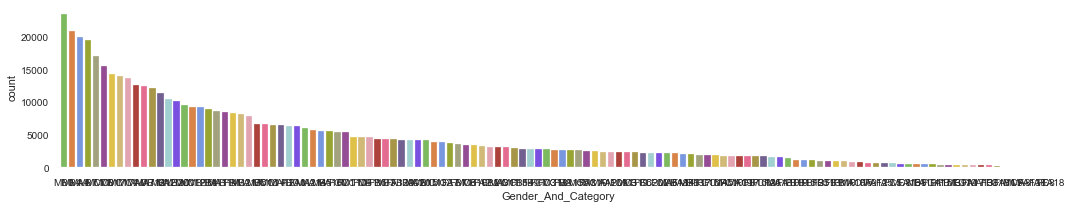

In [24]:
plt.figure(figsize=(15,3))
sns.countplot(x='Gender_And_Category', data=train_df,
              order=train_df['Gender_And_Category'].value_counts().index, palette=pkmn_type_colors)
sns.despine()
plt.tight_layout()

In [14]:
Check

NameError: name 'Check' is not defined

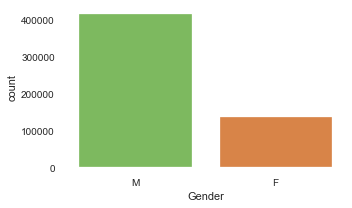

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender', data=train_df,
              order=train_df['Gender'].value_counts().index, palette=pkmn_type_colors)
sns.despine()
plt.tight_layout()

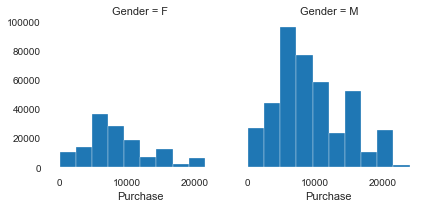

In [16]:
# impact of gender on Purchase
g = sns.FacetGrid(train_df, col="Gender",)
g.map(plt.hist, "Purchase")

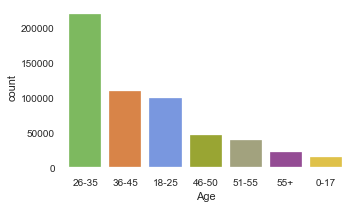

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x='Age', data=train_df,
              order=train_df['Age'].value_counts().index, palette=pkmn_type_colors)
sns.despine()
plt.tight_layout()

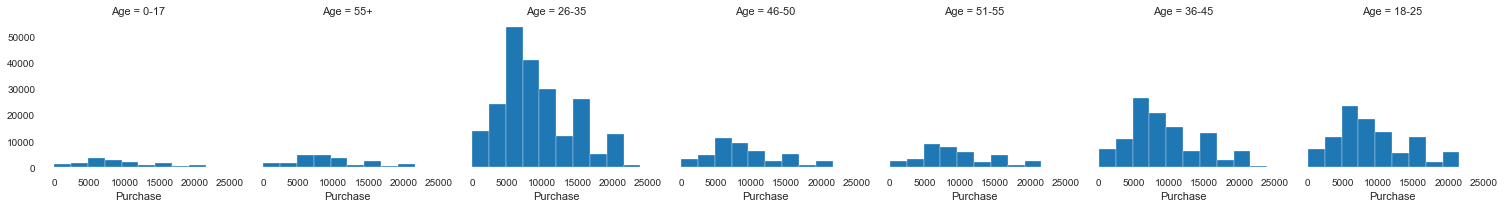

In [18]:
# impact of Age on Purchase
g = sns.FacetGrid(train_df, col="Age")
g.map(plt.hist, "Purchase")

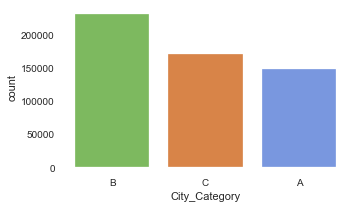

In [19]:
plt.figure(figsize=(5,3))
sns.countplot(x='City_Category', data=train_df,
              order=train_df['City_Category'].value_counts().index,palette = pkmn_type_colors)
sns.despine()
plt.tight_layout()

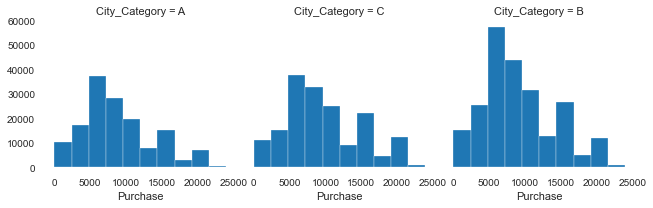

In [20]:
g = sns.FacetGrid(train_df, col="City_Category")
g.map(plt.hist, "Purchase")

In [ ]:
# Impact of city on Purchase
plt.figure(figsize=(5,3))
sns.catplot(x="City_Category", y="Purchase", kind="box",data=train_df,palette=pkmn_type_colors)

In [ ]:

plt.figure(figsize=(5,3))
sns.countplot(x='Stay_In_Current_City_Years', data=train_df,
              order=train_df['Stay_In_Current_City_Years'].value_counts().index, palette=pkmn_type_colors)
sns.despine()
plt.tight_layout()

In [ ]:
plt.figure(figsize=(5,3))
sns.catplot(x="Stay_In_Current_City_Years", y="Purchase", kind="box",data=train_df,palette=pkmn_type_colors)

In [ ]:
g = sns.FacetGrid(train_df, col="Stay_In_Current_City_Years")
g.map(plt.hist, "Purchase")

In [ ]:
product_id_median = train_df.groupby(['Product_ID'])['Purchase'].median().to_dict()
train_df['Product_ID_Median'] = train_df['Product_ID'].map(product_id_median)

In [ ]:
train_df['Product_Category_2'].fillna(0,inplace=True)
train_df['Product_Category_3'].fillna(0,inplace=True)
train_df['Product_Category_2'] = train_df['Product_Category_2'].astype(int)
train_df['Product_Category_3'] = train_df['Product_Category_3'].astype(int)
train_df['Product_ID'] = train_df['Product_ID'].str.replace('P00', '').astype('int')


In [ ]:
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].astype(str)
train_df['Occupation'] = train_df['Occupation'].astype(str)

In [ ]:
## Feature Correlation

In [ ]:
from yellowbrick.target import FeatureCorrelation

In [ ]:
train_df.head()

In [ ]:
from feature_engine import categorical_encoders as ce

In [ ]:
encoder = ce.OrdinalCategoricalEncoder(encoding_method='ordered',variables=[
    'Gender',
    'Age',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
])

In [ ]:
encoder.fit(X, y)


In [ ]:
train_df = encoder.transform(X)

In [ ]:
train_df['Purchase'] = y

In [ ]:
train_df.head()

In [ ]:
features = [col for col in train_df.columns if col not in ['Purchase']]
y = train_df['Purchase']
X = train_df[features]

In [ ]:
X.info()

In [ ]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [ ]:
import numpy as np

In [ ]:
corr = train_df.corr().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
purchase_stay_in_1yr = train_df[train_df['Stay_In_Current_City_Years']==1]

In [ ]:
pch_prd_agg =purchase_stay_in_1yr.groupby(['Product_Category_1'])['Purchase'].agg([np.mean,np.median,pd.Series.count]).reset_index()

In [ ]:
pch_prd_agg.sort_values(by=['median'])

In [ ]:
pch_prd_agg_gt_1=train_df[train_df['Stay_In_Current_City_Years']!=1].groupby(['Product_Category_1'])['Purchase'].agg([np.mean,np.median,pd.Series.count]).reset_index()

In [ ]:
pch_prd_agg_gt_1.sort_values(by=['median'])